In [3]:
#check librosa stft and istft
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from dataio import readdata, readlabels, writedata
from datafilters import apply_dc_filter, apply_dwt_filter, apply_stfft_filter

In [4]:
#Hyperparams

#DC Filter
enable_dc = True
dc_lowcut = 3.0
dc_highcut = 30.0
dc_order = 2
dc_type = "bandpass"
dc_func_type = "butter"

#DWT Filter
enable_dwt = False
dwt_type = "db2"
dwt_level = 4
dwt_thresh_func = "soft"
dwt_thresh_type = "rigrsure"

#STFT Filter
enable_fft = False
fft_window = 0.50
fft_step = 0.25
fft_thresh = 2.0
fft_set_thresh = 0.0

In [5]:
predataset = readdata("./curated/raw-presamples")
dataset = readdata("./curated/raw-samples")
#Constants
fs = 250.0 #Frequency in Hz
sample_time = dataset.shape[1]/fs #Total time for sample

#To get alpha and beta waves
dataset.flags['WRITEABLE'] = True

y = np.copy(dataset[0,:,0])

for i in range(0,dataset.shape[0]):
    for j in range(0,dataset.shape[2]):
        if enable_dc:
            dataset[i,:,j] = apply_dc_filter(dataset[i,:,j], fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)
        if enable_dwt:
            dataset[i,:,j] = apply_dwt_filter(dataset[i,:,j], dwt_type, dwt_level, dwt_thresh_func, dwt_thresh_type)
        if enable_fft:
            dataset[i,:,j] = apply_stfft_filter(dataset[i,:,j], fs, sample_time, fft_window, fft_step, fft_thresh, fft_set_thresh)
        #Normalize
        dataset[i,:,j] = dataset[i,:,j]/np.linalg.norm(dataset[i,:])

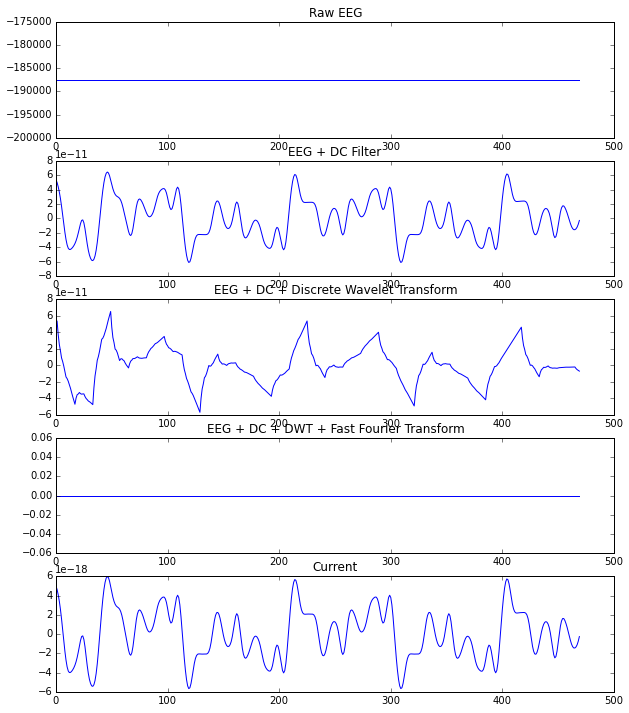

In [5]:
#Plots for comparison
plt.figure(1);
plt.figure(figsize=(10,12));

#Raw EEG Signal
plt.subplot(511);
plt.plot(y);
plt.title("Raw EEG")

#DC Filter
y1 = apply_dc_filter(y, fs, dc_lowcut, dc_highcut, dc_order, dc_type, dc_func_type)
plt.subplot(512);
plt.plot(y1);
plt.title("EEG + DC Filter");

#Discrete Wavelet Transform
y2 = apply_dwt_filter(y1, dwt_type, dwt_level, dwt_thresh_func, dwt_thresh_type)
plt.subplot(513);
plt.plot(y2);
plt.title("EEG + DC + Discrete Wavelet Transform");

#Fast Fourier Transform
y3 = apply_stfft_filter(y2, fs, sample_time, fft_window, fft_step, fft_thresh, fft_set_thresh)
plt.subplot(514);
plt.plot(y3);
plt.title("EEG + DC + DWT + Fast Fourier Transform");


#Current
plt.subplot(515);
plt.plot(dataset[0,:,0]);
plt.title("Current");
#plt.show()

In [6]:
test_size = 0.20
valid_size = 0.20
labels = readlabels("./curated/raw-inputs")

# Test Set
dataindex = range(0,dataset.shape[0])
test_index = np.random.choice(dataindex, int(dataset.shape[0]*test_size))
test_dataset = dataset[test_index,:,:]
test_labels = labels[test_index]
dataset = np.delete(dataset, test_index, axis = 0)
labels = np.delete(labels, test_index, axis = 0)

# Validation Set
dataindex = range(0,dataset.shape[0])
valid_index = np.random.choice(dataindex, int(dataset.shape[0]*valid_size))
valid_dataset = dataset[valid_index,:,:]
valid_labels = labels[valid_index]
dataset = np.delete(dataset, valid_index, axis = 0)
labels = np.delete(labels, valid_index, axis = 0)

# Train Set
train_dataset = dataset
train_labels = labels

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (24, 470, 8) (24,)
Validation: (5, 470, 8) (5,)
Testing: (6, 470, 8) (6,)


In [7]:
#Write training
writedata("./curated/train_dataset", train_dataset)
writedata("./curated/train_labels", train_labels)
#Write validation
writedata("./curated/valid_dataset", valid_dataset)
writedata("./curated/valid_labels", valid_labels)
#Write test
writedata("./curated/test_dataset", test_dataset)
writedata("./curated/test_labels", test_labels)
#plt.figure(figsize=(15,8))
#plt.plot(dataset[0,:,0])
#plt.show()

In [8]:
#Read training
train_dataset = readdata("./curated/train_dataset")
train_labels = readlabels("./curated/train_labels")
#Read validation
valid_dataset = readdata("./curated/valid_dataset")
valid_labels = readlabels("./curated/valid_labels")
#Read test
test_dataset = readdata("./curated/test_dataset")
test_labels = readlabels("./curated/test_labels")

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (24, 470, 8) (24,)
Validation: (5, 470, 8) (5,)
Testing: (6, 470, 8) (6,)


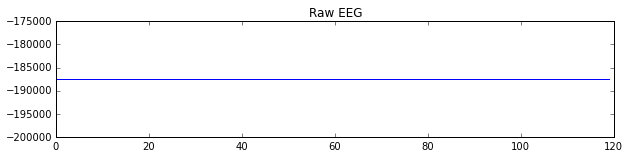

In [6]:
#Plots for comparison
plt.figure(1);
plt.figure(figsize=(10,12));

#Raw EEG Signal
plt.subplot(511);
plt.plot(predataset[0,:,0]);
plt.title("Raw EEG")

plt.show()